# 02 Linear Q agent

#### 👉 Let's use a linear model to approximat the q-value function.

![linear_model.jpg](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/linear_model.jpg?raw=true)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
!pip install gymnasium
!pip install gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/03_cart_pole/notebooks/')  # Add the parent directory to the path

Mounted at /content/drive


In [4]:
import gym
env = gym.make('CartPole-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Hyperparameters

In [5]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.0005652080372498697,
    'discount_factor': 0.99,
    'batch_size': 64,
    'memory_size': 100000,
    'freq_steps_train': 128,
    'freq_steps_update_target': 100,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.0429612235926375,
    'steps_epsilon_decay': 1000
}

SEED = 2636569667

## ⚠️ Fix random seeds

In [6]:
from src.utils import set_seed
set_seed(env, SEED)

/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


## QAgent

In [7]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


10 parameters


## Train the agent 🏋️

In [8]:
from src.loops import train
train(agent, env, n_episodes=2000)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 10%|▉         | 198/2000 [00:08<01:17, 23.19it/s]/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(

 10%|█         | 204/2000 [00:11<06:41,  4.47it/s]

Reward mean: 217.96, std: 31.80
Num steps mean: 217.96, std: 31.80


 20%|██        | 401/2000 [00:26<13:04,  2.04it/s]

Reward mean: 305.83, std: 64.91
Num steps mean: 305.83, std: 64.91


 30%|███       | 601/2000 [00:50<27:44,  1.19s/it]

Reward mean: 417.93, std: 72.99
Num steps mean: 417.93, std: 72.99


 40%|████      | 802/2000 [01:08<05:38,  3.54it/s]

Reward mean: 233.44, std: 78.06
Num steps mean: 233.44, std: 78.06


 50%|█████     | 1003/2000 [01:23<03:52,  4.29it/s]

Reward mean: 228.46, std: 69.92
Num steps mean: 228.46, std: 69.92


 60%|██████    | 1204/2000 [01:38<02:33,  5.17it/s]

Reward mean: 212.14, std: 55.01
Num steps mean: 212.14, std: 55.01


 70%|███████   | 1404/2000 [01:51<01:43,  5.74it/s]

Reward mean: 195.01, std: 48.84
Num steps mean: 195.01, std: 48.84


 80%|████████  | 1604/2000 [02:02<01:07,  5.91it/s]

Reward mean: 177.29, std: 33.92
Num steps mean: 177.29, std: 33.92


 90%|█████████ | 1803/2000 [02:13<00:36,  5.42it/s]

Reward mean: 171.31, std: 36.70
Num steps mean: 171.31, std: 36.70


100%|██████████| 2000/2000 [02:22<00:00, 14.01it/s]

Reward mean: 158.55, std: 35.96
Num steps mean: 158.55, std: 35.96


## Evaluate the agent ⏱️

In [9]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|██████████| 1000/1000 [00:15<00:00, 63.35it/s]


In [10]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 160.69, std 37.31


## Let's see how far we got in each attempt

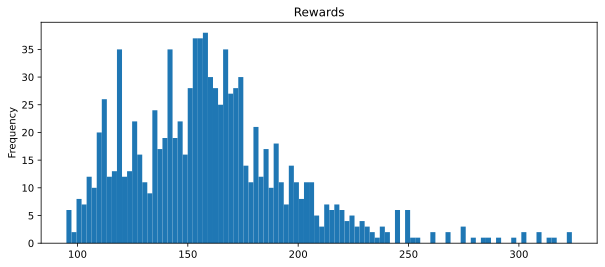

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

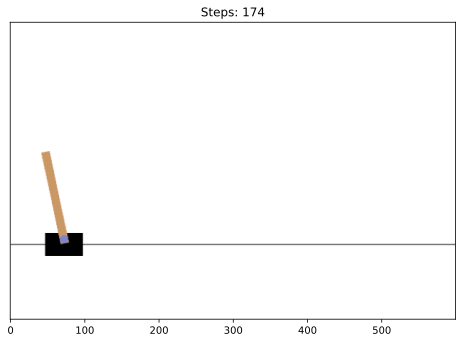

In [12]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)

In [13]:
eval_rewards, eval_steps = evaluate(
    agent, env,
    n_episodes=10,
    epsilon=0.001
)
eval_rewards

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
100%|██████████| 10/10 [00:00<00:00, 57.33it/s]


[105.0, 161.0, 177.0, 166.0, 236.0, 154.0, 129.0, 218.0, 194.0, 143.0]